In [1]:
import copy
import sys
sys.path.insert(0, "..")
from classes.atoms import Atom, Atom_Collection, create_atom_col_copies
from classes.calculators.lennardjones import LennardJones
from classes.optimizers.random_struct_search import Line_searcher
import numpy as np
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

In [2]:
pos_flat = np.loadtxt('../Week4/lj10clusters.txt')
positions = pos_flat.reshape(-1,pos_flat.shape[1]//2,2)[3]
atom_list = [Atom(position=pos, size=20) for pos in positions+np.array([5.0,6.0])]
unit_cell = (np.array([10.0,0]), np.array([0.0,10.0]))
atom_col_no_per = Atom_Collection(atomlist=atom_list, unit_cell=unit_cell)
atom_col_no_per.calculator = LennardJones()
atom_list = [Atom(position=pos, size=20) for pos in positions+np.array([10.0,11.0])]
atom_col_per = Atom_Collection(atomlist=atom_list, unit_cell=unit_cell, pbc=True)
atom_col_per.calculator = LennardJones()

NOTE VECTORS SUPPLIED ALSO HAVE TO BE ORDERED, so (v1 --> [L,0]) and (v2 --> [0,L])


c:\Users\karst\Computational-Physics\Week7\..\classes\atoms.py:129: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if displacement_vectors == "auto":


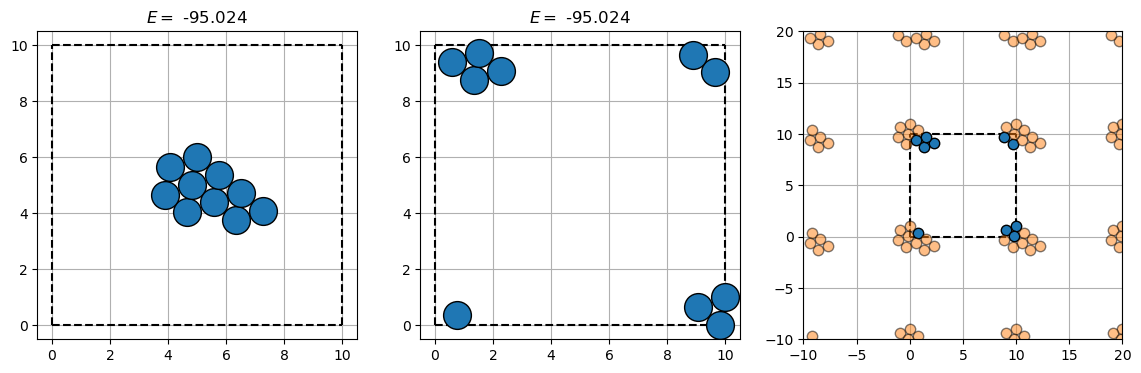

In [3]:
fig, axs = plt.subplots(1,3, figsize=(14,4))
atom_cols = [atom_col_no_per, atom_col_per]
for ax, atom_col in zip(axs[0:2], atom_cols):
    ax.grid()
    ax.set_xlim([-0.5,10.5])
    ax.set_ylim([-0.5,10.5])
    atom_col.plot(ax=ax, plot_cell=True)
    atom_col.reset_plot_axes()
    ax.set_title(rf"$E=$ {atom_col.get_potential_energy().round(3)}")

displace_vectors = np.array([[0.0,0.0], [10.0,0.0], [-10.0,0.0], [-10.0,-10.0], [0.0,-10.0], [10.0, -10.0], [-10.0,10.0],[0.0,10.0], [10.0,10.0]])
atom_col_per.plot_cells(ax=axs[2], displacement_vectors=displace_vectors, size=7.5)
atom_col_per.reset_plot_axes()
axs[2].grid()
axs[2].set_xlim([-10.0,20.0])
axs[2].set_ylim([-10.0,20.0])
atom_col_per.set_sizes([20 for i in range(len(atom_col_per))])

NOTE VECTORS SUPPLIED ALSO HAVE TO BE ORDERED, so (v1 --> [L,0]) and (v2 --> [0,L])
NOTE VECTORS SUPPLIED ALSO HAVE TO BE ORDERED, so (v1 --> [L,0]) and (v2 --> [0,L])


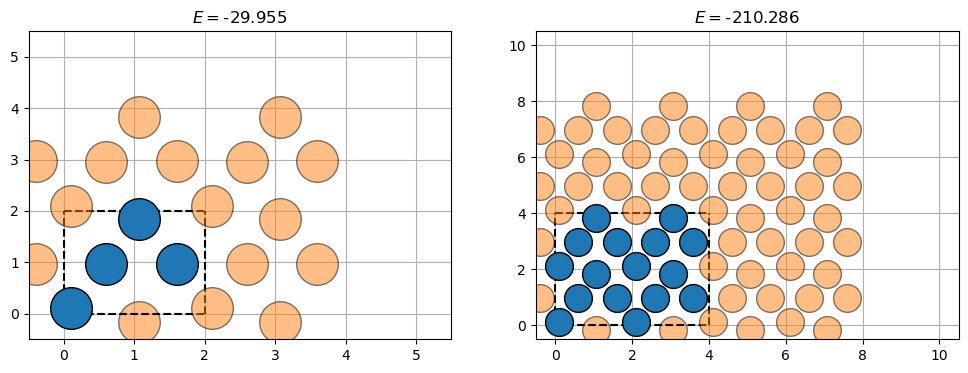

In [4]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
for ax, grid in zip(axs, [[-0.5,5.5], [-0.5,10.5]]):
    ax.set_xlim(grid)
    ax.set_ylim(grid)
    ax.grid()

unit_cell = (np.array([2.0, 0.0]), np.array([0.0,2.0]))
atom_poses = [np.array([0.1,0.1]), np.array([0.6,0.6]), np.array([1.1,0.1]), np.array([1.6,0.6])]
freeze_atoms = [True] + [False for i in range(3)]
atom_col = Atom_Collection(atomlist=[Atom(position=pos, frozen=froz, size=30) for pos, froz in zip(atom_poses, freeze_atoms)], unit_cell=unit_cell, pbc=True)
atom_col.calculator = LennardJones()
optimizer = Line_searcher(atom_col=atom_col)
pos_opt, f = optimizer.run()
opt_col = create_atom_col_copies(atom_col=atom_col, positions=pos_opt, velocities=np.zeros(shape=pos_opt.shape))[0]
axs[0].set_title(rf"$E = ${opt_col.get_potential_energy().round(3)}")
opt_col.plot_cells(ax=axs[0], size=30)

l1, l2 = unit_cell
new_poses = []
for i in [0.0, 1.0]:
    for j in [0.0, 1.0]:
        disp_pos = pos_opt + l1*i + l2*j
        new_poses.append(disp_pos)
unit_cell = (np.array([4.0, 0.0]), np.array([0.0,4.0]))
atom_col = Atom_Collection(atomlist=[Atom(position=pos, size=30) for pos in np.array(new_poses).reshape(4**2, 2)], unit_cell=unit_cell, pbc=True)
atom_col.calculator = LennardJones()
axs[1].set_title(rf"$E = ${atom_col.get_potential_energy().round(3)}")
atom_col.plot_cells(ax=axs[1], size=20)
atom_col.reset_plot_axes()

NOTE VECTORS SUPPLIED ALSO HAVE TO BE ORDERED, so (v1 --> [L,0]) and (v2 --> [0,L])


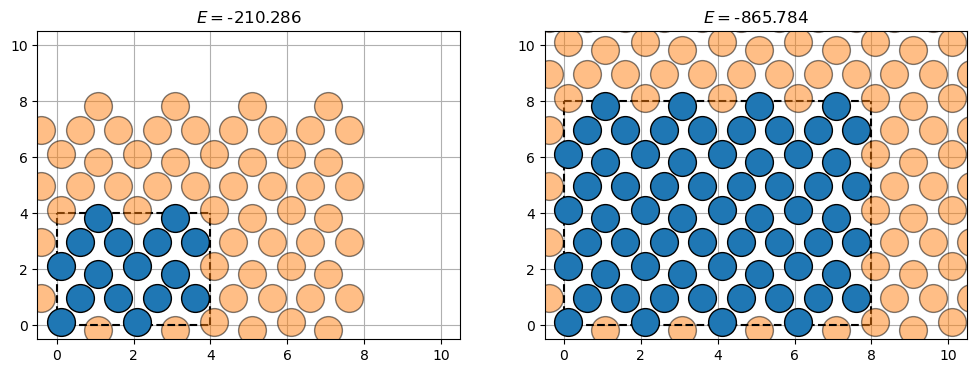

In [5]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
for ax, grid in zip(axs, [[-0.5,10.5], [-0.5,10.5]]):
    ax.set_xlim(grid)
    ax.set_ylim(grid)
    ax.grid()

axs[0].set_title(rf"$E = ${atom_col.get_potential_energy().round(3)}")
atom_col.plot_cells(ax=axs[0], size=20)

unit_cell = (np.array([4.0, 0.0]), np.array([0.0,4.0]))
l1, l2 = unit_cell
new_poses = []
for i in [0.0, 1.0]:
    for j in [0.0, 1.0]:
        disp_pos = atom_col.positions + l1*i + l2*j
        new_poses.append(disp_pos)
unit_cell = (np.array([8.0, 0.0]), np.array([0.0,8.0]))
atom_col = Atom_Collection(atomlist=[Atom(position=pos, size=30) for pos in np.array(new_poses).reshape(8**2, 2)], unit_cell=unit_cell, pbc=True)
atom_col.calculator = LennardJones()
axs[1].set_title(rf"$E = ${atom_col.get_potential_energy().round(3)}")
atom_col.plot_cells(ax=axs[1], size=20)

In [6]:
pos_flat = np.loadtxt('../Week4/lj10clusters.txt')
positions = pos_flat.reshape(-1,pos_flat.shape[1]//2,2)[3]+np.array([10.0,11.0])
unit_cell = (np.array([10.0,0]), np.array([0.0,10.0]))
positions[-4]+=np.array([1.0,-2.0])
frozens = [True for i in range(6)] + [False] + [True for i in range(3)] #Freezing all other atoms than the one that has been moved.
atom_list = [Atom(position=pos, size=20, frozen=froz) for pos, froz in zip(positions, frozens)]
atom_col_per = Atom_Collection(atomlist=atom_list, unit_cell=unit_cell, pbc=True)
atom_col_per.calculator = LennardJones()

optimizer = Line_searcher(atom_col=atom_col_per)
opt_pos, f = optimizer.run()
opt_col = create_atom_col_copies(atom_col=atom_col_per, positions=opt_pos, velocities=np.zeros(shape=opt_pos.shape))[0]

NOTE VECTORS SUPPLIED ALSO HAVE TO BE ORDERED, so (v1 --> [L,0]) and (v2 --> [0,L])


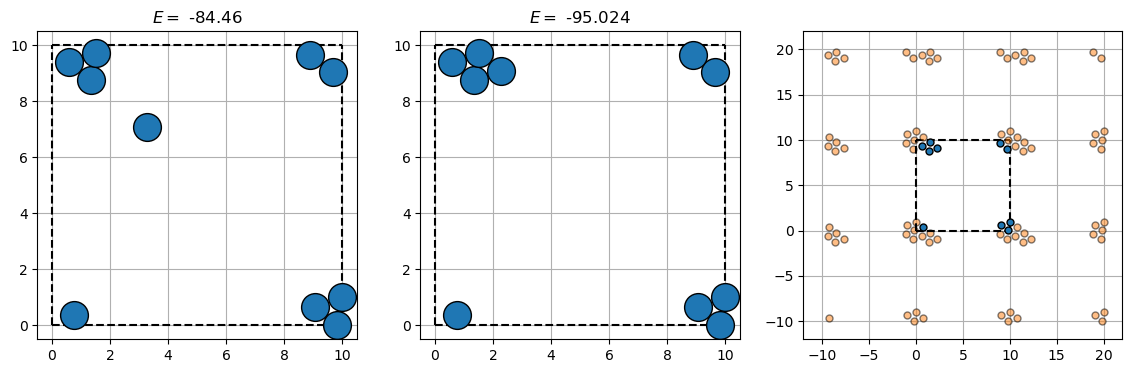

In [7]:

fig, axs = plt.subplots(1,3, figsize=(14,4))
atom_cols = [atom_col_per, opt_col]
for ax, atom_col in zip(axs[0:2], atom_cols):
    ax.grid()
    ax.set_xlim([-0.5,10.5])
    ax.set_ylim([-0.5,10.5])
    atom_col.plot(ax=ax, plot_cell=True)
    atom_col.reset_plot_axes()
    ax.set_title(rf"$E=$ {atom_col.get_potential_energy().round(3)}")

atom_col_per.reset_plot_axes()
axs[2].grid()
axs[2].set_xlim([-12.0,22.0])
axs[2].set_ylim([-12.0,22.0])
atom_col_per.set_sizes([20 for i in range(len(atom_col_per))])
opt_col.reset_plot_axes()
opt_col.plot_cells(ax=axs[2], size=5)